#### K-Means 클러스터링 방법은 단순하고 강력한 방법이지만 클러스터의 모양이 원형이 아닌 경우에는 잘 동작하지 않으며 클러스터의 갯수를 사용자가 지정해주어야 한다는 단점이 있다.

DBSCAN(Density-Based Spatial Clustering of Applications with Noise) 방법은 데이터가 밀집한 정도 

#### 즉 밀도를 이용하여 클러스터의 형태에 구애받지 않으며 클러스터의 갯수를 사용자가 지정할 필요가 없다. 

#### DBSCAN 방법에서는 초기 데이터로부터 근접한 데이터를 찾아나가는 방법으로 클러스터를 확장한다. 

이 때 다음 사용자 인수를 사용한다.

+ epsilon  𝜀 : 이웃(neighborhood)을 정의하기 위한 거리
+ 최소 데이터 갯수(minimum points): 밀집 지역을 정의하기 위해 필요한 이웃의 갯수

#### 알고리즘

(1) 만약  𝜀  거리 안인 이웃 영역 안에 최소 데이터 갯수 이상의 데이터가 있으면 그 데이터는 핵심(core) 데이터이다. 

(2) 이렇게 핵심 데이터를 찾아낸 다음에는 이 핵심 데이터의 이웃 영역 안에 있는 데이터를 이 핵심 데이터와 연결된(reached) 고밀도 데이터로 정의한다. 

+ 고밀도 데이터의 이웃 영역 안에 있는 데이터도 마찬가지고 연결된 고밀도 데이터가 된다. 

(3) 만약 고밀도 데이터에 더 이상 이웃이 없으면 이 데이터는 경계(border) 데이터라고 하며 연결은 끝난다. 
+ 핵심 데이터도 아니고 경계 데이터도 아닌 데이터를 outlier라고 한다.

[그림] https://datascienceschool.net/upfiles/3ee92719553b477fa941c84c0faebd34.png

#### scikit-learn의 cluster 서브패키지는 DBSCAN 클러스터링을 위한 DBSCAN 클래스를 제공한다. 

다음과 같은 인수를 받을 수 있다.

+ eps: 이웃을 정의하기 위한 거리. epsilon.
+ min_samples: 핵심 데이터를 정의하기 위해 필요한 이웃영역안의 데이터 갯수.

클러스터링이 끝나면 다음 속성을 가진다.

+ labels_: 클러스터 번호. 아웃라이어는 -1 값을 가진다.
+ core_sample_indices_: 핵심 데이터의 인덱스. 여기에 포함되지 않고 아웃라이어도 아닌 데이터는 경계 데이터다.

다음은 make_circles 명령과 make_moons 명령으로 만든 동심원, 초승달 데이터를 DBSCAN 방법으로 클러스터링한 결과를 나타낸 것이다. 마커(marker)의 모양은 클러스터를 나타내고 마커의 크기가 큰 데이터는 핵심데이터, x 표시된 데이터는 outlier이다.

In [1]:
from sklearn.datasets import make_circles, make_moons
from sklearn.cluster import DBSCAN

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)

In [3]:
n_samples = 1000
np.random.seed(2)
X1, y1 = make_circles(n_samples=n_samples, factor=.5, noise=.09)
X2, y2 = make_moons(n_samples=n_samples, noise=.1)

In [4]:
def plot_DBSCAN(title, X, eps, xlim, ylim):
    model = DBSCAN(eps=eps)
    y_pred = model.fit_predict(X)
    idx_outlier = model.labels_ == -1
    plt.scatter(X[idx_outlier, 0], X[idx_outlier, 1], marker='x', lw=1, s=20)
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], marker='o', facecolor='g', s=5) # 클러스터 0
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], marker='s', facecolor='y', s=5) # 클러스터 1
    
    X_core = X[model.core_sample_indices_, :]  # 핵심데이터의 인덱스
    idx_core_0 = np.array(list(set(np.where(model.labels_ == 0)[0]).intersection(model.core_sample_indices_)))
    idx_core_1 = np.array(list(set(np.where(model.labels_ == 1)[0]).intersection(model.core_sample_indices_)))
    plt.scatter(X[idx_core_0, 0], X[idx_core_0, 1], marker='o', facecolor='g', s=80, alpha=0.3)
    plt.scatter(X[idx_core_1, 0], X[idx_core_1, 1], marker='s', facecolor='y', s=80, alpha=0.3)
    
    plt.grid(False)
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    return y_pred

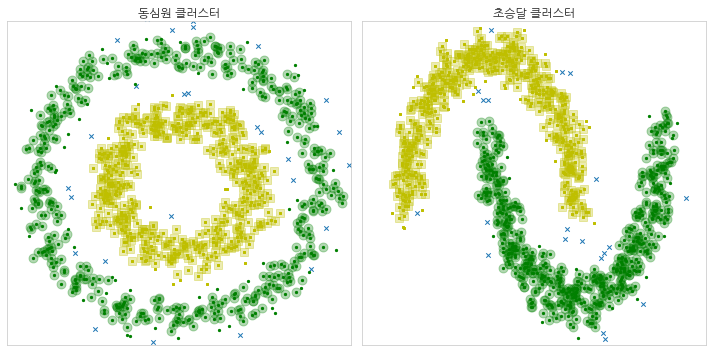

In [5]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
y_pred1 = plot_DBSCAN("동심원 클러스터", X1, 0.1, (-1.2, 1.2), (-1.2, 1.2))
plt.subplot(122)
y_pred2 = plot_DBSCAN("초승달 클러스터", X2, 0.1, (-1.5, 2.5), (-0.8, 1.2))
plt.tight_layout()
plt.show()

이 클러스터링 결과의 adjusted Rand index와 adjusted mutual info 값은 다음과 같다.

In [6]:
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score

print("Circle ARI:", adjusted_rand_score(y1, y_pred1))
print("Circle AMI:", adjusted_mutual_info_score(y1, y_pred1))
print("Moon ARI:", adjusted_rand_score(y2, y_pred2))
print("Moon AMI:", adjusted_mutual_info_score(y2, y_pred2))

Circle ARI: 0.9414262371038592
Circle AMI: 0.8361564005781013
Moon ARI: 0.9544844153926417
Moon AMI: 0.8606657095694518
